In [1]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import rembg
import random

In [2]:
image_dir = "cavallo"

images = []
for filename in os.listdir(image_dir):
    image_path = os.path.join(image_dir, filename)
    image = cv2.imread(image_path)
    
    if image is not None:
        image = cv2.resize(image, (120, 120))
        images.append(image)

print("Number of images read:", len(images))

KeyboardInterrupt: 

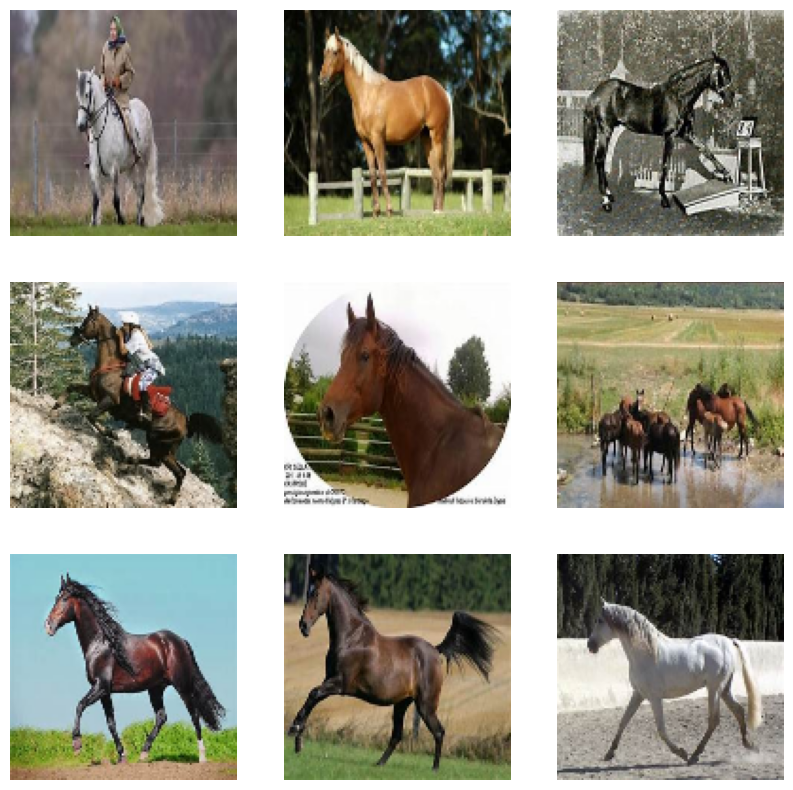

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    ax.axis('off')

plt.show()

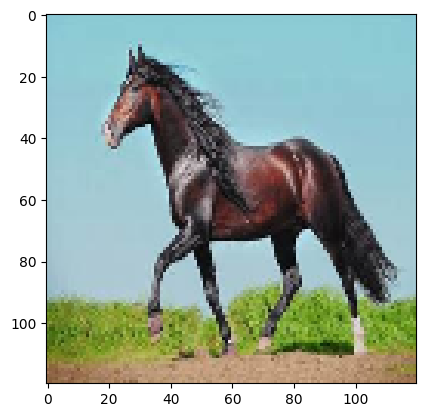

In [ ]:
plt.imshow(cv2.cvtColor(images[6], cv2.COLOR_BGR2RGB))

In [ ]:
def divide_image(image):
    parts = []
    height, width, _ = image.shape
    part_height = height // 3
    part_width = width // 3
    
    for i in range(3):
        for j in range(3):
            part = image[i*part_height:(i+1)*part_height, j*part_width:(j+1)*part_width]
            parts.append(part)
    
    return parts

In [ ]:
def generate_combinations(parts, num_combinations):
    combinations = []
    original_positions = []
    indices = list(range(len(parts)))
    
    for _ in range(num_combinations):
        random.shuffle(indices)
        combination = [parts[i] for i in indices]
        combinations.append(combination)
        original_positions.append(indices.copy())
    
    return combinations, original_positions

In [ ]:
parts = divide_image(images[6])

<function matplotlib.pyplot.show(close=None, block=None)>

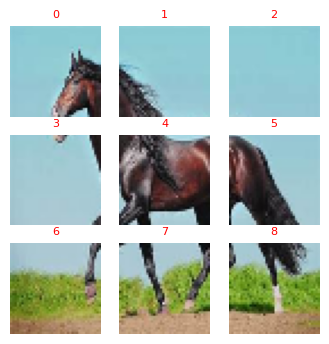

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(4, 4))
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(cv2.cvtColor(parts[i * 3 + j], cv2.COLOR_BGR2RGB))
        axs[i, j].set_title(i * 3 + j, fontsize=8, color='red')
        axs[i, j].axis('off')
               
plt.show

In [ ]:
comb = generate_combinations(parts,1)

<function matplotlib.pyplot.show(close=None, block=None)>

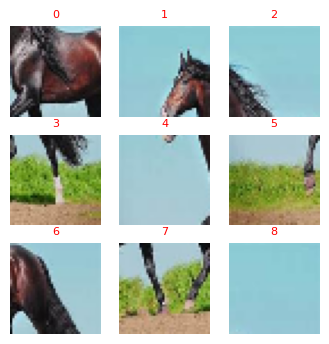

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(4, 4))
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(cv2.cvtColor(comb[0][0][i * 3 + j], cv2.COLOR_BGR2RGB))
        axs[i, j].set_title(i * 3 + j, fontsize=8, color='red')
        axs[i, j].axis('off')
               
plt.show

## remove background for each tile seperately

In [ ]:
background_removed_images = []
for image in comb[0][0]:        
    removed_img = rembg.remove(image)
    removed_img = np.where(removed_img == 0, 1, removed_img)
    background_removed_images.append(removed_img)

<function matplotlib.pyplot.show(close=None, block=None)>

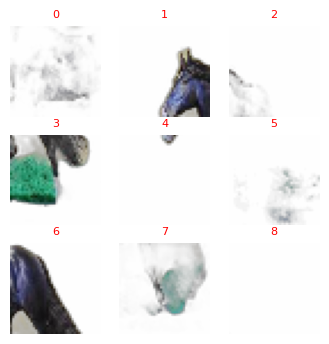

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(4, 4))
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(background_removed_images[i * 3 + j])
        axs[i, j].set_title(i * 3 + j, fontsize=8, color='red')
        axs[i, j].axis('off')
               
plt.show

In [ ]:
def stitch_shuffled_image(parts):
    num_parts = len(parts)
    part_size = parts[0].shape[0]  # Assuming all parts are square
    
    stitched_image_size = int(np.sqrt(num_parts) * part_size)
    stitched_image = np.zeros((stitched_image_size, stitched_image_size, parts[0].shape[2]), dtype=np.uint8)
    
    for i in range(stitched_image.shape[0] // part_size):
        for j in range(stitched_image.shape[1] // part_size):
            part_index = i * int(stitched_image.shape[0] / part_size) + j
            stitched_image[i*part_size:(i+1)*part_size, j*part_size:(j+1)*part_size] = parts[part_index]
    
    return stitched_image

## send stiched up tiles for bg removal

In [ ]:
stiched_img = stitch_shuffled_image(comb[0][0])

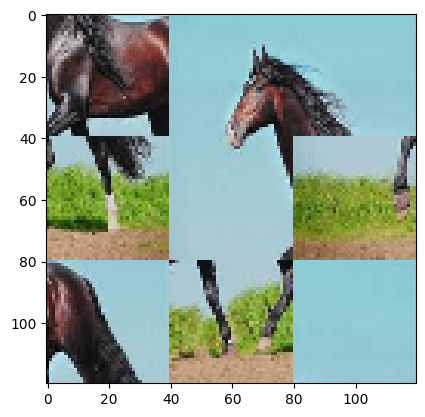

In [ ]:
plt.imshow(cv2.cvtColor(stiched_img, cv2.COLOR_BGR2RGB))

In [ ]:
removed_img = rembg.remove(stiched_img)
removed_img = np.where(removed_img == 0, 1, removed_img)

In [ ]:
plt.imshow(removed_img)

## with opencv built-in functions

In [ ]:
import cv2
fgbg = cv2.createBackgroundSubtractorMOG2()

In [ ]:
background_removed_images = []
for image in parts:   
    fgmask = fgbg.apply(image)
    fgmask = cv2.bitwise_not(fgmask)
    removed_img = cv2.bitwise_and(image, image, mask = fgmask)     
    background_removed_images.append(removed_img)

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(4, 4))
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(background_removed_images[i * 3 + j])
        axs[i, j].set_title(i * 3 + j, fontsize=8, color='red')
        axs[i, j].axis('off')
               
plt.show